<p align="center">
<img align="center" width="600" src="../imgs/logo.png">
<h3 align="center">Introduction to Data Science</h3>
<h4 align="center">Chapter 1.3: Feature engineering in practice</h4>
<h5 align="center">Yam Peleg</h5>
</p>
<hr>

Many of the slides and notebooks in this repository are based on other repositories and tutorials. 

**References for this notebook:**  

* **[deja vu - House Prices: EDA to ML (Beginner)](https://www.kaggle.com/dejavu23/house-prices-eda-to-ml-beginner)**
<hr>

### The Data

![](https://www.reno.gov/Home/ShowImage?id=7739&t=635620964226970000)

**Competition Description from Kaggle**  
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

**Data description**  
This is a detailed description of the 79 features and their entries, quite important for this competition.  
You can download the txt file here: [**download**](https://www.kaggle.com/c/5407/download/data_description.txt)

# Part 1: Data wrangling

**Drop all columns with only small correlation to SalePrice**  
**Transform Categorical to numerical **  
**Handling columns with missing data**  
**Log values**  
**Drop all columns with strong correlation to similar features**  

**Imports**

In [17]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

**Load data**

In [18]:
df_train = pd.read_csv("../data/house_prices.csv")

### Dropping all columns with weak correlation to SalePrice

In [19]:
catg_strong_corr = [ 'MSZoning', 'Neighborhood', 'Condition2', 'MasVnrType', 'ExterQual', 
                     'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

catg_weak_corr = ['Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 
                  'LandSlope', 'Condition1',  'BldgType', 'HouseStyle', 'RoofStyle', 
                  'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterCond', 'Foundation', 
                  'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 
                  'HeatingQC', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
                  'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 
                  'SaleCondition' ]
      
    
target = 'SalePrice'
min_val_corr = 0.4    

    
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
   
corr = df_train.corr()
corr_abs = corr.abs()

nr_num_cols = len(numerical_feats)
ser_corr = corr_abs.nlargest(nr_num_cols, target)[target]

cols_abv_corr_limit = list(ser_corr[ser_corr.values > min_val_corr].index)
cols_bel_corr_limit = list(ser_corr[ser_corr.values <= min_val_corr].index)
id_test = df_train['Id']

to_drop_num  = cols_bel_corr_limit
to_drop_catg = catg_weak_corr

cols_to_drop = ['Id'] + to_drop_num + to_drop_catg 

for df in [df_train]:
    df.drop(cols_to_drop, inplace= True, axis = 1)


### Convert categorical columns to numerical  
For those categorcial features where the EDA with boxplots seem to show a strong dependence of the SalePrice on the category, we transform the columns to numerical.
To investigate the relation of the categories to SalePrice in more detail, we make violinplots for these features 
Also, we look at the mean of SalePrice as function of category.

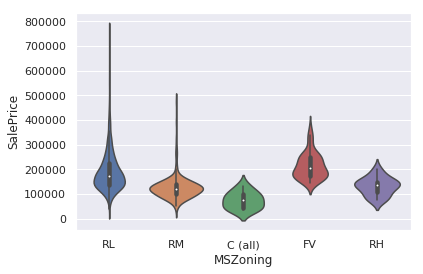

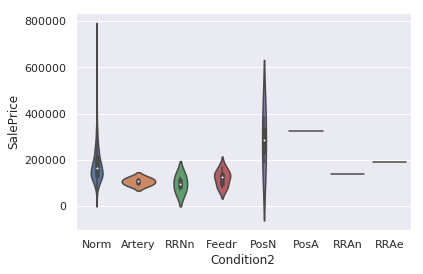

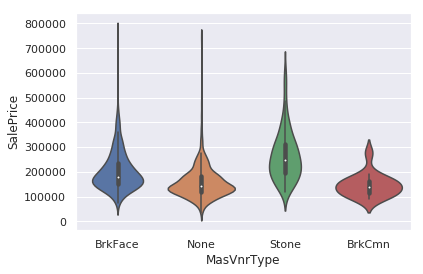

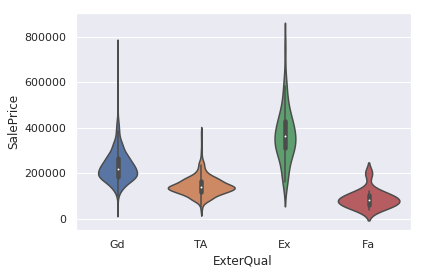

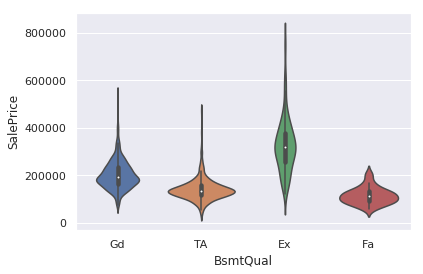

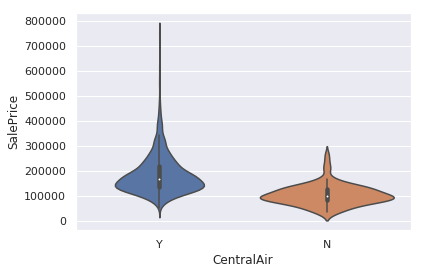

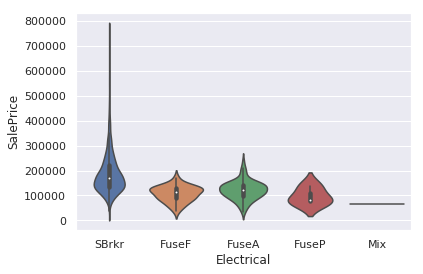

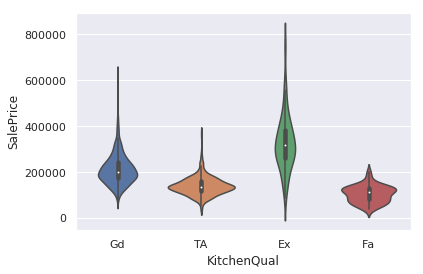

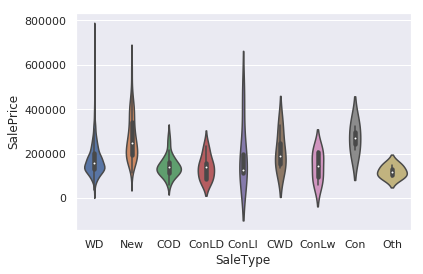

In [20]:
catg_list = catg_strong_corr
catg_list.remove('Neighborhood')

for catg in catg_list :
    #sns.catplot(x=catg, y=target, data=df_train, kind='boxen')
    sns.violinplot(x=catg, y=target, data=df_train)
    plt.show()
    #sns.boxenplot(x=catg, y=target, data=df_train)
    #bp = df_train.boxplot(column=[target], by=catg)

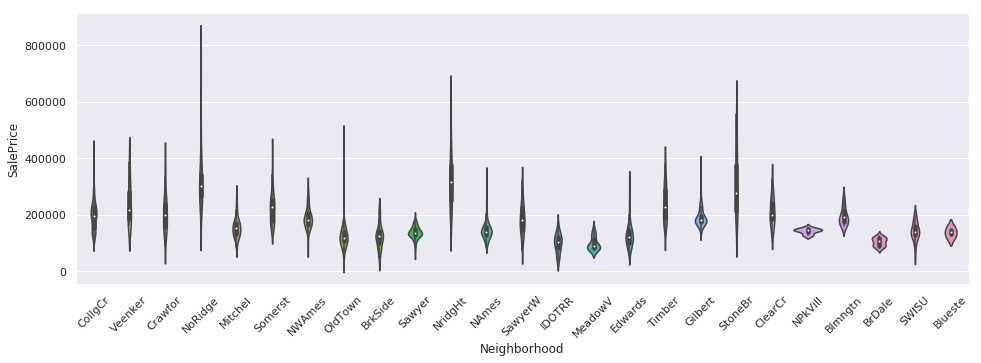

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 5)
sns.violinplot(x='Neighborhood', y=target, data=df_train, ax=ax)
plt.xticks(rotation=45)
plt.show()

In [22]:
for catg in catg_list :
    g = df_train.groupby(catg)[target].mean()
    print(g)

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64
Condition2
Artery    106500.000000
Feedr     121166.666667
Norm      181169.405536
PosA      325000.000000
PosN      284875.000000
RRAe      190000.000000
RRAn      136905.000000
RRNn       96750.000000
Name: SalePrice, dtype: float64
MasVnrType
BrkCmn     146318.066667
BrkFace    204691.871910
None       156221.891204
Stone      265583.625000
Name: SalePrice, dtype: float64
ExterQual
Ex    367360.961538
Fa     87985.214286
Gd    231633.510246
TA    144341.313466
Name: SalePrice, dtype: float64
BsmtQual
Ex    327041.041322
Fa    115692.028571
Gd    202688.478964
TA    140759.818182
Name: SalePrice, dtype: float64
CentralAir
N    105264.073684
Y    186186.709890
Name: SalePrice, dtype: float64
Electrical
FuseA    122196.893617
FuseF    107675.444444
FuseP     97333.333333
Mix       67000.000000
SBrkr    186825.113193
Name: 

In [23]:
# 'MSZoning'
msz_catg2 = ['RM', 'RH']
msz_catg3 = ['RL', 'FV'] 


# Neighborhood
nbhd_catg2 = ['Blmngtn', 'ClearCr', 'CollgCr', 'Crawfor', 'Gilbert', 'NWAmes', 'Somerst', 'Timber', 'Veenker']
nbhd_catg3 = ['NoRidge', 'NridgHt', 'StoneBr']

# Condition2
cond2_catg2 = ['Norm', 'RRAe']
cond2_catg3 = ['PosA', 'PosN'] 

# SaleType
SlTy_catg1 = ['Oth']
SlTy_catg3 = ['CWD']
SlTy_catg4 = ['New', 'Con']


#[]

In [24]:
for df in [df_train]:
    
    df['MSZ_num'] = 1  
    df.loc[(df['MSZoning'].isin(msz_catg2) ), 'MSZ_num'] = 2    
    df.loc[(df['MSZoning'].isin(msz_catg3) ), 'MSZ_num'] = 3        
    
    df['NbHd_num'] = 1       
    df.loc[(df['Neighborhood'].isin(nbhd_catg2) ), 'NbHd_num'] = 2    
    df.loc[(df['Neighborhood'].isin(nbhd_catg3) ), 'NbHd_num'] = 3    

    df['Cond2_num'] = 1       
    df.loc[(df['Condition2'].isin(cond2_catg2) ), 'Cond2_num'] = 2    
    df.loc[(df['Condition2'].isin(cond2_catg3) ), 'Cond2_num'] = 3    
    
    df['Mas_num'] = 1       
    df.loc[(df['MasVnrType'] == 'Stone' ), 'Mas_num'] = 2 
    
    df['ExtQ_num'] = 1       
    df.loc[(df['ExterQual'] == 'TA' ), 'ExtQ_num'] = 2     
    df.loc[(df['ExterQual'] == 'Gd' ), 'ExtQ_num'] = 3     
    df.loc[(df['ExterQual'] == 'Ex' ), 'ExtQ_num'] = 4     
   
    df['BsQ_num'] = 1          
    df.loc[(df['BsmtQual'] == 'Gd' ), 'BsQ_num'] = 2     
    df.loc[(df['BsmtQual'] == 'Ex' ), 'BsQ_num'] = 3     
 
    df['CA_num'] = 0          
    df.loc[(df['CentralAir'] == 'Y' ), 'CA_num'] = 1    

    df['Elc_num'] = 1       
    df.loc[(df['Electrical'] == 'SBrkr' ), 'Elc_num'] = 2 


    df['KiQ_num'] = 1       
    df.loc[(df['KitchenQual'] == 'TA' ), 'KiQ_num'] = 2     
    df.loc[(df['KitchenQual'] == 'Gd' ), 'KiQ_num'] = 3     
    df.loc[(df['KitchenQual'] == 'Ex' ), 'KiQ_num'] = 4      
    
    df['SlTy_num'] = 2       
    df.loc[(df['SaleType'].isin(SlTy_catg1) ), 'SlTy_num'] = 1  
    df.loc[(df['SaleType'].isin(SlTy_catg3) ), 'SlTy_num'] = 3  
    df.loc[(df['SaleType'].isin(SlTy_catg4) ), 'SlTy_num'] = 4  
  

### Checking correlation to SalePrice for the new numerical columns

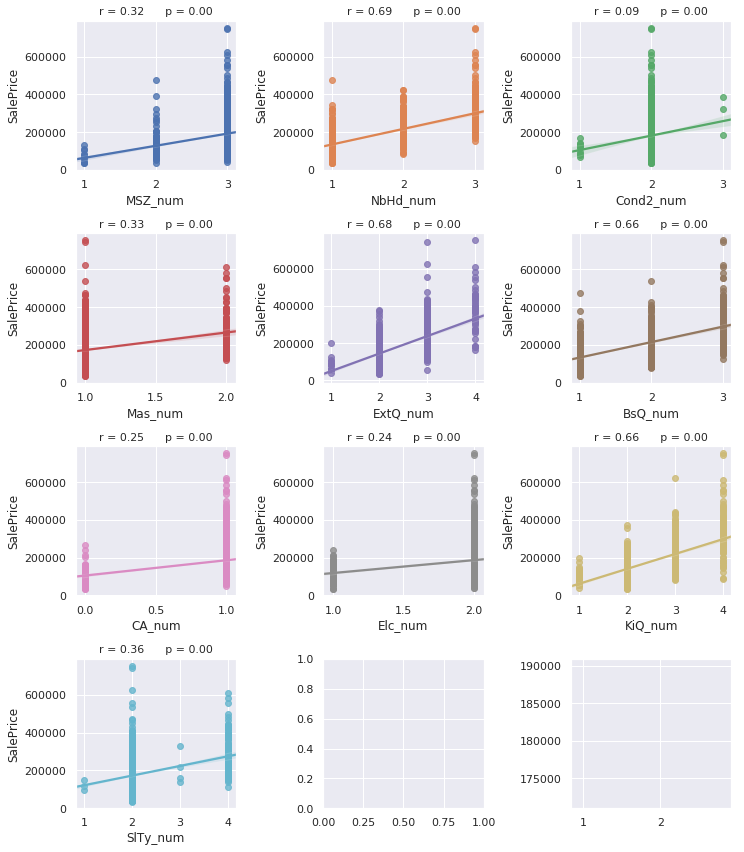

In [25]:
new_col_num = ['MSZ_num', 'NbHd_num', 'Cond2_num', 'Mas_num', 'ExtQ_num', 'BsQ_num', 'CA_num', 'Elc_num', 'KiQ_num', 'SlTy_num']

nr_rows = 4
nr_cols = 3

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(new_col_num):
            sns.regplot(df_train[new_col_num[i]], df_train[target], ax = axs[r][c])
            stp = stats.pearsonr(df_train[new_col_num[i]], df_train[target])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "      " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

There are few columns with quite large correlation to SalePrice (NbHd_num, ExtQ_num, BsQ_num, KiQ_num).  
These will probably be useful for optimal performance of the Regressors in part 3.

**Dropping the converted categorical columns and the new numerical columns with weak correlation**

**columns and correlation before dropping**

In [26]:
catg_cols_to_drop = ['Neighborhood' , 'Condition2', 'MasVnrType', 'ExterQual', 'BsmtQual','CentralAir', 'Electrical', 'KitchenQual', 'SaleType']

corr1 = df_train.corr()
corr_abs_1 = corr1.abs()

nr_all_cols = len(df_train)
ser_corr_1 = corr_abs_1.nlargest(nr_all_cols, target)[target]

print(ser_corr_1)
cols_bel_corr_limit_1 = list(ser_corr_1[ser_corr_1.values <= min_val_corr].index)


for df in [df_train] :
    df.drop(catg_cols_to_drop, inplace= True, axis = 1)
    df.drop(cols_bel_corr_limit_1, inplace= True, axis = 1)    

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
NbHd_num        0.693937
ExtQ_num        0.682639
KiQ_num         0.659600
BsQ_num         0.659239
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
SlTy_num        0.362388
Mas_num         0.330476
MSZ_num         0.322199
CA_num          0.251328
Elc_num         0.241896
Cond2_num       0.094540
Name: SalePrice, dtype: float64


**columns and correlation after dropping**

In [27]:
corr2 = df_train.corr()
corr_abs_2 = corr2.abs()

nr_all_cols = len(df_train)
ser_corr_2 = corr_abs_2.nlargest(nr_all_cols, target)[target]

print(ser_corr_2)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
NbHd_num        0.693937
ExtQ_num        0.682639
KiQ_num         0.659600
BsQ_num         0.659239
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64


**new dataframes**

In [28]:
df_train.head()

,MSZoning,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,SalePrice,NbHd_num,ExtQ_num,BsQ_num,KiQ_num
0,RL,7,2003,2003,196.0,856,856,1710,2,8,0,2003.0,2,548,208500,2,3,2,3
1,RL,6,1976,1976,0.0,1262,1262,1262,2,6,1,1976.0,2,460,181500,2,2,2,2
2,RL,7,2001,2002,162.0,920,920,1786,2,6,1,2001.0,2,608,223500,2,3,2,3
3,RL,7,1915,1970,0.0,756,961,1717,1,7,1,1998.0,3,642,140000,2,2,1,3
4,RL,8,2000,2000,350.0,1145,1145,2198,2,9,1,2000.0,3,836,250000,3,3,2,3


**List of all features with strong correlation to SalePrice_Log**  
after dropping all coumns with weak correlation

In [29]:
corr = df_train.corr()
corr_abs = corr.abs()

nr_all_cols = len(df_train)
print (corr_abs.nlargest(nr_all_cols, target)[target])

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
NbHd_num        0.693937
ExtQ_num        0.682639
KiQ_num         0.659600
BsQ_num         0.659239
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
Name: SalePrice, dtype: float64


### Correlation Matrix 2 : All features with strong correlation to SalePrice

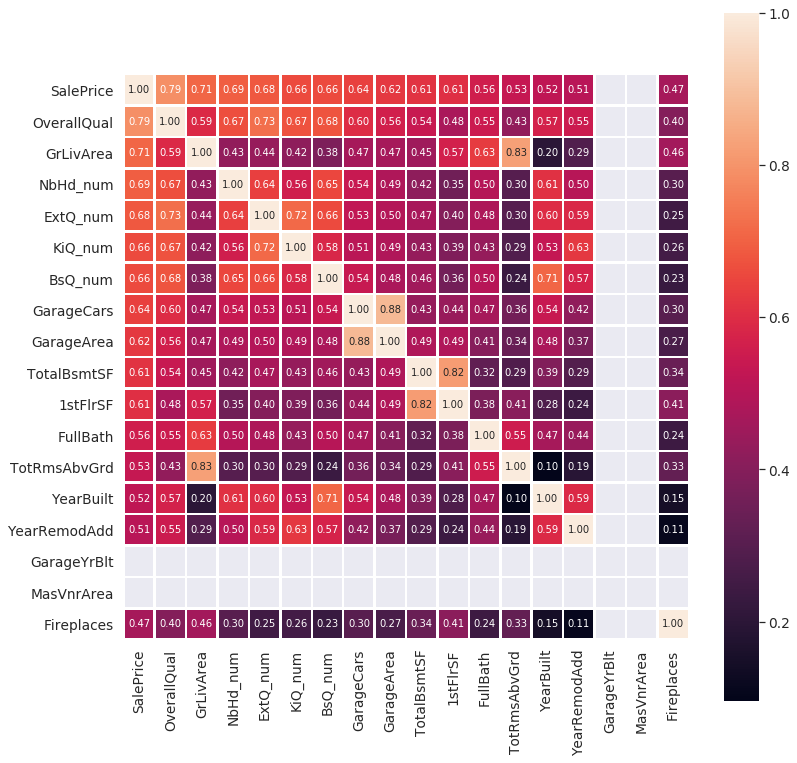

In [30]:
def plot_corr_matrix(df, nr_c, targ) :
    
    corr = df.corr()
    corr_abs = corr.abs()
    cols = corr_abs.nlargest(nr_c, targ)[targ].index
    cm = np.corrcoef(df[cols].values.T)

    plt.figure(figsize=(nr_c/1.5, nr_c/1.5))
    sns.set(font_scale=1.25)
    sns.heatmap(cm, linewidths=1.5, annot=True, square=True, 
                fmt='.2f', annot_kws={'size': 10}, 
                yticklabels=cols.values, xticklabels=cols.values
               )
    plt.show()
nr_feats=len(df_train.columns)
plot_corr_matrix(df_train, nr_feats, target)

**Check for Multicollinearity**

Strong correlation of these features to other, similar features:

'GrLivArea_Log' and 'TotRmsAbvGrd'

'GarageCars' and 'GarageArea'

'TotalBsmtSF' and '1stFlrSF'

'YearBuilt' and 'GarageYrBlt'

**Of those features we drop the one that has smaller correlation coeffiecient to Target.**

In [31]:
drop_similar = 1 
cols = corr_abs.nlargest(nr_all_cols, target)[target].index
cols = list(cols)

if drop_similar == 1 :
    for col in ['GarageArea','1stFlrSF','TotRmsAbvGrd','GarageYrBlt'] :
        if col in cols: 
            cols.remove(col)

In [32]:
cols = list(cols)
print(cols)

['SalePrice', 'OverallQual', 'GrLivArea', 'NbHd_num', 'ExtQ_num', 'KiQ_num', 'BsQ_num', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces']


**List of features used for the Regressors in Part 3**

In [33]:
feats = cols
feats.remove('SalePrice')

print(feats)

['OverallQual', 'GrLivArea', 'NbHd_num', 'ExtQ_num', 'KiQ_num', 'BsQ_num', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces']


In [34]:
df_train_ml = df_train[feats]


y = df_train[target]

### StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler

all_data = df_train


li_get_dummies = ['OverallQual', 'NbHd_num', 'GarageCars','ExtQ_num', 'KiQ_num',
                  'BsQ_num', 'FullBath', 'Fireplaces', 'MSZoning']
all_data = pd.get_dummies(all_data, columns=li_get_dummies, drop_first=True)


df_train_ml = all_data[:df_train.shape[0]]
sc = StandardScaler()
df_train_ml_sc = sc.fit_transform(df_train_ml)

/home/yam/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/yam/anaconda2/lib/python2.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [36]:
df_train_ml_sc = pd.DataFrame(df_train_ml_sc)
df_train_ml_sc.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,1.050994,0.878668,0.510015,-0.459303,-0.793434,0.370333,0.912210,0.992426,0.351000,0.347273,-0.045376,-0.117851,-0.293785,-0.611123,-0.586842,1.891244,-0.360598,-0.1742,-0.111726,1.318792,-0.329515,-0.581568,0.878547,-0.376187,-0.058621,-1.278819,1.411313,-0.192177,-1.006873,1.221257,-0.271163,1.167244,-0.300609,-0.895806,0.949232,-0.152071,-0.895806,-0.292407,-0.058621,-0.215859,-0.105263,0.518133,-0.418955
1,0.156734,-0.429577,-0.572835,0.466465,0.257140,-0.482512,-0.318683,-0.101543,-0.060731,0.007288,-0.045376,-0.117851,-0.293785,-0.611123,1.704037,-0.528753,-0.360598,-0.1742,-0.111726,1.318792,-0.329515,-0.581568,0.878547,-0.376187,-0.058621,0.781971,-0.708560,-0.192177,0.993174,-0.818829,-0.271163,1.167244,-0.300609,-0.895806,0.949232,-0.152071,1.116313,-0.292407,-0.058621,-0.215859,-0.105263,0.518133,-0.418955
2,0.984752,0.830215,0.322174,-0.313369,-0.627826,0.515013,-0.318683,0.911391,0.631726,0.536154,-0.045376,-0.117851,-0.293785,-0.611123,-0.586842,1.891244,-0.360598,-0.1742,-0.111726,1.318792,-0.329515,-0.581568,0.878547,-0.376187,-0.058621,-1.278819,1.411313,-0.192177,-1.006873,1.221257,-0.271163,1.167244,-0.300609,-0.895806,0.949232,-0.152071,1.116313,-0.292407,-0.058621,-0.215859,-0.105263,0.518133,-0.418955
3,-1.863632,-0.720298,-0.572835,-0.687324,-0.521734,0.383659,0.296763,0.789839,0.790804,-0.515281,-0.045376,-0.117851,-0.293785,-0.611123,-0.586842,1.891244,-0.360598,-0.1742,-0.111726,1.318792,-0.329515,-0.581568,-1.138243,2.658251,-0.058621,0.781971,-0.708560,-0.192177,-1.006873,1.221257,-0.271163,-0.856719,-0.300609,1.116313,-1.053483,-0.152071,1.116313,-0.292407,-0.058621,-0.215859,-0.105263,0.518133,-0.418955
4,0.951632,0.733308,1.360826,0.199680,-0.045611,1.299326,1.527656,0.870874,1.698485,0.869843,-0.045376,-0.117851,-0.293785,-0.611123,-0.586842,-0.528753,2.773171,-0.1742,-0.111726,-0.758270,3.034764,-0.581568,-1.138243,2.658251,-0.058621,-1.278819,1.411313,-0.192177,-1.006873,1.221257,-0.271163,1.167244,-0.300609,-0.895806,0.949232,-0.152071,1.116313,-0.292407,-0.058621,-0.215859,-0.105263,0.518133,-0.418955


**Creating Datasets for ML algorithms**

In [37]:
X = df_train_ml.copy()
y = df_train[target]

X_sc = df_train_ml_sc.copy()
y_sc = df_train[target]


X.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
YearBuilt         1460 non-null int64
YearRemodAdd      1460 non-null int64
MasVnrArea        1452 non-null float64
TotalBsmtSF       1460 non-null int64
1stFlrSF          1460 non-null int64
GrLivArea         1460 non-null int64
TotRmsAbvGrd      1460 non-null int64
GarageYrBlt       1379 non-null float64
GarageArea        1460 non-null int64
SalePrice         1460 non-null int64
OverallQual_2     1460 non-null uint8
OverallQual_3     1460 non-null uint8
OverallQual_4     1460 non-null uint8
OverallQual_5     1460 non-null uint8
OverallQual_6     1460 non-null uint8
OverallQual_7     1460 non-null uint8
OverallQual_8     1460 non-null uint8
OverallQual_9     1460 non-null uint8
OverallQual_10    1460 non-null uint8
NbHd_num_2        1460 non-null uint8
NbHd_num_3        1460 non-null uint8
GarageCars_1      1460 non-null uint8
GarageCars_2      1460 non-null uint8
GarageCars_3   

NameError: name 'X_test' is not defined

In [ ]:
X.head()

In [ ]:
X_sc.head()